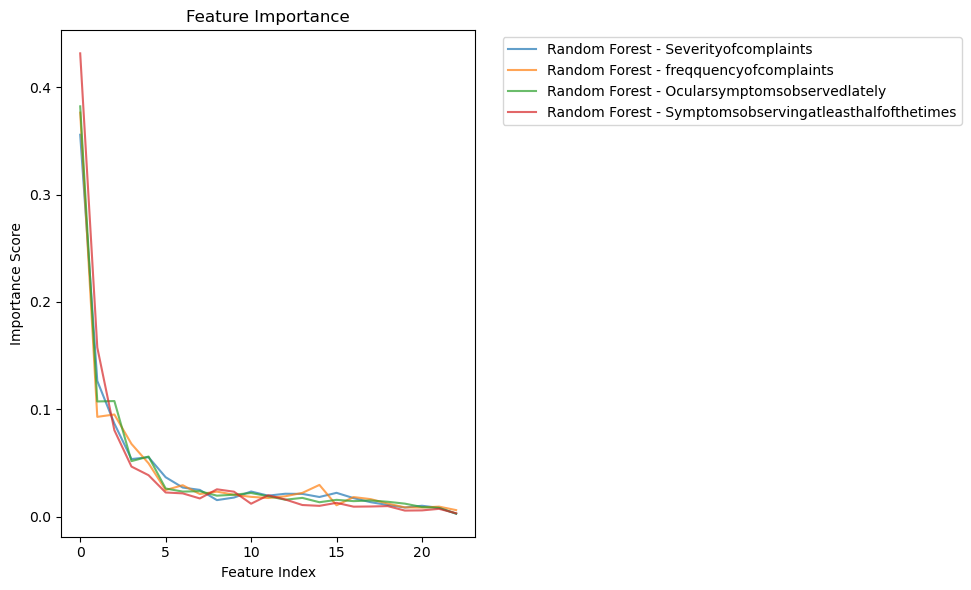

Model: Random Forest
Target Variable 1:
Severityofcomplaints: 0.35566078750418556
freqquencyofcomplaints: 0.12652004069230796
Ocularsymptomsobservedlately: 0.08677893083609689
Age: 0.055496829654078615
Symptomsobservingatleasthalfofthetimes: 0.053751994191520006
hoursspentdailynoncurricular: 0.03686018131098434
wearables: 0.027257206165414178
Avgnighttimeusageperday: 0.02505335473756394
Difficultyinfocusingafterusingscreens: 0.02356023748228438
levelofgadjetwithrespecttoeyes: 0.02232869413634008
screenillumination: 0.021477640034736113
frequencyofdryeyes: 0.021330989338674722
Complaintsfrequency: 0.019707180590536454
Nature: 0.01845743142824256
workingyears: 0.017936481029850078
Duration: 0.01738938826878152
hoursspentdailycurricular: 0.015554430815833204
onlineplatforms: 0.013605538845589633
Blinkingduringscreenusage: 0.011036199636914724
Sex: 0.010294327650194663
Distancekeptbetweeneyesandgadjet: 0.008677267401226674
Gadgetsused: 0.00836601626112899
RVIS: 0.0028988519875148477
Target

In [16]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('digital-eye.csv')
data.drop(['Name'], axis=1, inplace=True)
data.fillna(method='ffill', inplace=True) 

data = data.drop_duplicates()

# Separate features (inputs) and target variables (outputs)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'])
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# List of all categorical features
categorical_features = ['Sex', 'wearables', 'onlineplatforms', 'Nature', 'screenillumination', 
                        'hoursspentdailycurricular', 'hoursspentdailynoncurricular', 'Gadgetsused', 
                        'levelofgadjetwithrespecttoeyes', 'Blinkingduringscreenusage', 
                        'Difficultyinfocusingafterusingscreens', 'freqquencyofcomplaints', 
                        'Severityofcomplaints', 'RVIS', 'Complaintsfrequency', 'frequencyofdryeyes']

# One-hot encoding for categorical features
X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)
# Combine one-hot encoded categorical features with numerical features
X_processed = pd.concat([X.drop(columns=categorical_features), X_categorical], axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Models
models = {
    'Random Forest': RandomForestRegressor(),
   
}

# Feature Importance Analysis for each model
feature_importance_dict = {}
for name, model in models.items():
    # For each target variable, fit the model separately and get feature importances
    importances = []
    for i in range(y_train.shape[1]):
        model.fit(X_train, y_train.iloc[:, i])
        if hasattr(model, 'feature_importances_'):
            importances.append(model.feature_importances_)
        elif hasattr(model, 'coef_'):
            importances.append(np.abs(model.coef_))
        else:
            importances.append(None)
    feature_importance_dict[name] = importances

# Get feature names
feature_names = X_train.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
for name, importances in feature_importance_dict.items():
    if importances is not None:
        valid_importances = [imp for imp in importances if imp is not None]  # Filter out None values
        if valid_importances:  # Check if there are valid importances
            sorted_indices = np.argsort(np.mean(valid_importances, axis=0))[::-1]  # Sort features based on mean importance score
            sorted_importances = np.array(valid_importances)[:, sorted_indices]
            feature_names_sorted = np.array(feature_names)[sorted_indices]

            for i, importance in enumerate(sorted_importances):
                plt.plot(importance, label=f'{name} - {feature_names_sorted[i]}', alpha=0.7)

plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print important features for each model
for name, importances in feature_importance_dict.items():
    print(f"Model: {name}")
    for i, importance in enumerate(importances):
        if importance is not None:
            sorted_indices = np.argsort(importance)[::-1]  # Sort feature indices in descending order of importance
            print(f"Target Variable {i+1}:")
            for idx in sorted_indices:
                print(f"{feature_names[idx]}: {importance[idx]}")
    print()  # Add an empty line between models

